# 2.2. EDA

## Adding Healthcare and Education Expenditure to the analysis

In [61]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('demographic.csv')
df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                18288 non-null  object 
 1   Year                                        18288 non-null  int64  
 2   Population                                  18288 non-null  int64  
 3   Population of children under the age of 1   18288 non-null  float64
 4   Population of children under the age of 5   18288 non-null  int64  
 5   Population of children under the age of 15  18288 non-null  int64  
 6   Population under the age of 25              18288 non-null  int64  
 7   Population aged 15 to 64 years              18288 non-null  int64  
 8   Population older than 15 years              18288 non-null  int64  
 9   Population older than 18 years              18288 non-null  int64  
 10  Population

In [64]:
# Function to find the growth rate of certain aspects of the dataset, 1

def population_growth_rate(df, column):
    df.loc[:, ['Population Growth Rate']] = ((df[column].diff() / df[column].shift(1)) * 100).fillna(0)
    df.loc[population_growth['Year'] == 1950, 'Population Growth Rate'] = 0
    
    pivot_data = df.pivot(index = 'Year', columns = 'Country name', values = 'Population Growth Rate')
    print(pivot_data.head())
    
    return df

In [65]:
population_growth = df[['Country name', 'Year', 'Population']]
population_growth = population_growth_rate(population_growth, 'Population')
population_growth.head()

Country name  Afghanistan  Africa (UN)   Albania   Algeria  American Samoa  \
Year                                                                         
1950             0.000000     0.000000  0.000000  0.000000        0.000000   
1951             1.217545     2.168647  2.920995  2.792447        2.046492   
1952             1.267800     2.194585  2.930712  2.695955        0.719905   
1953             1.265270     2.210306  2.998590  2.625402        0.551386   
1954             1.284556     2.226728  3.092306  2.454663        0.446814   

Country name   Andorra    Angola  Anguilla  Antigua and Barbuda  Argentina  \
Year                                                                         
1950          0.000000  0.000000  0.000000             0.000000   0.000000   
1951         -2.986065  2.044533  4.527403             2.125132   1.979498   
1952         -6.378249  2.061910  3.020517             2.063677   1.954765   
1953         -2.557078  2.031596  2.286557             2.021950

,Country name,Year,Population,Population Growth Rate
0,Afghanistan,1950,7480464,0.000000
1,Afghanistan,1951,7571542,1.217545
2,Afghanistan,1952,7667534,1.267800
3,Afghanistan,1953,7764549,1.265270
4,Afghanistan,1954,7864289,1.284556


In [66]:
# Mean growth rate for countries per year

def mean_population_growth_rate(df, column):
    avg_countries = df.groupby('Country name')[column].mean()
    pos_avg_countries = avg_countries.sort_values(ascending = False)

    print(pos_avg_countries.head(20))
    return avg_countries

In [67]:
avg_growth = mean_population_growth_rate(population_growth, 'Population Growth Rate')

Country name
United Arab Emirates          7.044490
Qatar                         6.846476
Western Sahara                5.479180
Kuwait                        4.902302
Sint Maarten (Dutch part)     4.885728
Jordan                        4.619196
Djibouti                      4.109573
Mayotte                       3.876915
Andorra                       3.702056
French Guiana                 3.600381
Bahrain                       3.582518
Saudi Arabia                  3.474564
Saint Martin (French part)    3.454159
Oman                          3.259401
Cote d'Ivoire                 3.258728
Cayman Islands                3.233234
Niger                         3.226378
Brunei                        3.145964
Kenya                         3.129412
Turks and Caicos Islands      3.103667
Name: Population Growth Rate, dtype: float64


In [68]:
#Finding the dependent population

dependent_population = df['Population of children under the age of 15'] 
+ (df['Population older than 15 years'] - df['Population aged 15 to 64 years'])
    
working_age_population = df['Population aged 15 to 64 years']

df['Dependency Ratio'] = (dependent_population / working_age_population) * 100

print(df[['Country name', 'Year', 'Dependency Ratio']])

      Country name  Year  Dependency Ratio
0      Afghanistan  1950         73.092567
1      Afghanistan  1951         73.069236
2      Afghanistan  1952         73.082765
3      Afghanistan  1953         73.145202
4      Afghanistan  1954         73.292028
...            ...   ...               ...
18283     Zimbabwe  2017         77.181389
18284     Zimbabwe  2018         76.125337
18285     Zimbabwe  2019         75.145062
18286     Zimbabwe  2020         74.198369
18287     Zimbabwe  2021         73.359971

[18288 rows x 3 columns]


In [69]:
dependency_df = df[['Country name', 'Year', 'Dependency Ratio']]
dependency_df = mean_population_growth_rate(dependency_df, 'Dependency Ratio')

Country name
Niger               96.601238
Uganda              95.725714
Kenya               95.669379
Zambia              94.840280
Palestine           94.176657
Mayotte             93.812062
Marshall Islands    93.635146
Zimbabwe            90.439569
Burundi             90.045450
Rwanda              89.851394
Somalia             88.933516
Chad                88.675489
Yemen               88.371056
Afghanistan         88.370962
Sudan               88.303377
Tanzania            88.283880
Samoa               87.509283
Malawi              87.089574
Eswatini            86.960016
Angola              86.787277
Name: Dependency Ratio, dtype: float64


### Education dataset

In [70]:
df1 = pd.read_csv('education.csv', header = 4)
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.85084,5.887830,5.491060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.71730,4.743500,4.692000,4.820445,4.739750,4.541950,4.352440,4.632255,3.906225,NaN
2,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.69522,3.255800,4.543970,4.343190,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.91423,3.195421,2.899100,3.535590,3.071543,3.100235,3.403950,3.282970,2.928443,NaN
4,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.93000,3.100000,2.754937,2.466879,2.044701,2.073064,2.744997,2.297109,2.332126,NaN


In [71]:
#removing 3 columns (country code, indicator name and indicator code)
df1 = df1.drop(columns=[df1.columns[1], df1.columns[2], df1.columns[3]])
df1.reset_index(drop=True, inplace = True)
df1.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.85084,5.887830,5.491060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.71730,4.743500,4.692000,4.820445,4.739750,4.541950,4.352440,4.632255,3.906225,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.69522,3.255800,4.543970,4.343190,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.91423,3.195421,2.899100,3.535590,3.071543,3.100235,3.403950,3.282970,2.928443,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.93000,3.100000,2.754937,2.466879,2.044701,2.073064,2.744997,2.297109,2.332126,NaN


In [72]:
#dropping all columns with all values of nan
df1 = df1.dropna(axis=1, how='all')
df1.head()

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.442770,5.85084,5.887830,5.491060,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.689917,4.71730,4.743500,4.692000,4.820445,4.739750,4.541950,4.352440,4.632255,3.906225
2,Afghanistan,NaN,1.16036,1.11718,1.42788,NaN,1.30332,NaN,NaN,NaN,...,3.454460,3.69522,3.255800,4.543970,4.343190,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.029710,2.91423,3.195421,2.899100,3.535590,3.071543,3.100235,3.403950,3.282970,2.928443
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.870000,2.93000,3.100000,2.754937,2.466879,2.044701,2.073064,2.744997,2.297109,2.332126


In [73]:
df1.rename(columns={'Country Name': 'Country name'}, inplace=True)
df1 = df1.melt(id_vars=['Country name'], var_name='Year', value_name='Percent_expenditure_education')
df1['Year'] = df1['Year'].astype(int)
df_education = pd.merge(df, df1, on=['Country name', 'Year'])
df_education.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years,Dependency Ratio,Percent_expenditure_education
0,Afghanistan,1970,10752973,470485.0,1952791,4705422,6700729,5761197,6047550,5396652,...,1274479,902653,588007,330016,128348,20897,676,1.0,81.674381,NaN
1,Afghanistan,1971,11015853,483113.0,2011245,4848646,6878049,5875332,6167206,5497000,...,1297423,921039,599944,336054,130782,21560,718,1.0,82.525481,1.16036
2,Afghanistan,1972,11286753,496219.0,2070876,4995574,7060970,5993595,6291178,5601031,...,1321272,939466,612071,342463,133460,22270,760,1.0,83.348541,1.11718
3,Afghanistan,1973,11575308,510031.0,2133578,5150746,7258886,6120996,6424560,5713350,...,1347846,958685,625045,349254,136354,23009,802,2.0,84.148822,1.42788
4,Afghanistan,1974,11869881,524557.0,2197676,5309219,7466050,6250850,6560659,5828271,...,1376174,977551,638392,356314,139310,23735,844,3.0,84.935953,NaN


In [74]:
mean_expenditure_per_country = df_education.groupby('Country name')['Percent_expenditure_education'].mean()

# Display the mean expenditure for each country
print(mean_expenditure_per_country)

Country name
Afghanistan        2.956045
Albania            3.396933
Algeria            6.752106
American Samoa    14.717050
Andorra            2.730517
                    ...    
Uzbekistan         5.517407
Vanuatu            5.773378
World              4.202399
Zambia             3.721578
Zimbabwe           9.139065
Name: Percent_expenditure_education, Length: 188, dtype: float64


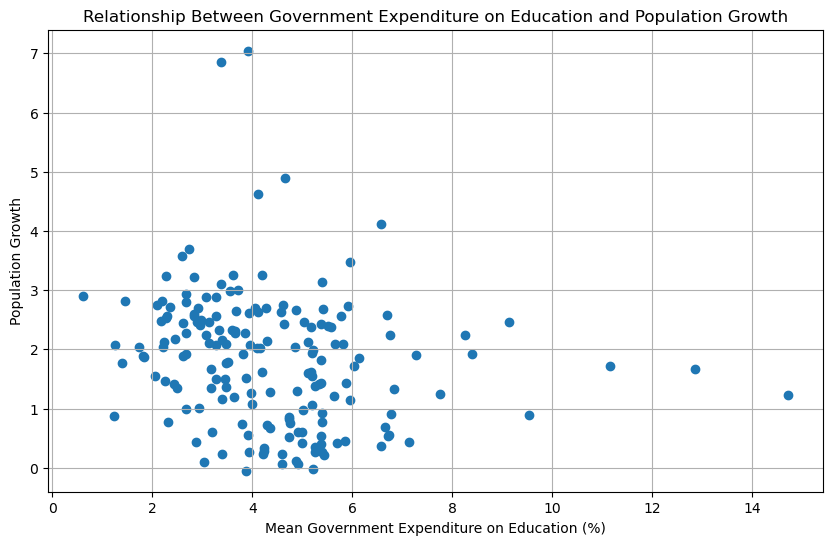

In [75]:
#Finding relationship between education expenditure and average population growth rate
growth_expenditure = pd.merge(avg_growth, mean_expenditure_per_country, on='Country name')

plt.figure(figsize=(10, 6))
plt.scatter(growth_expenditure['Percent_expenditure_education'], growth_expenditure['Population Growth Rate'])
plt.title('Relationship Between Government Expenditure on Education and Population Growth')
plt.xlabel('Mean Government Expenditure on Education (%)')
plt.ylabel('Population Growth')
plt.grid(True)
plt.show()

In [77]:
corr = growth_expenditure['Percent_expenditure_education'].corr(growth_expenditure['Population Growth Rate'])
print(corr)

-0.20150267650217457


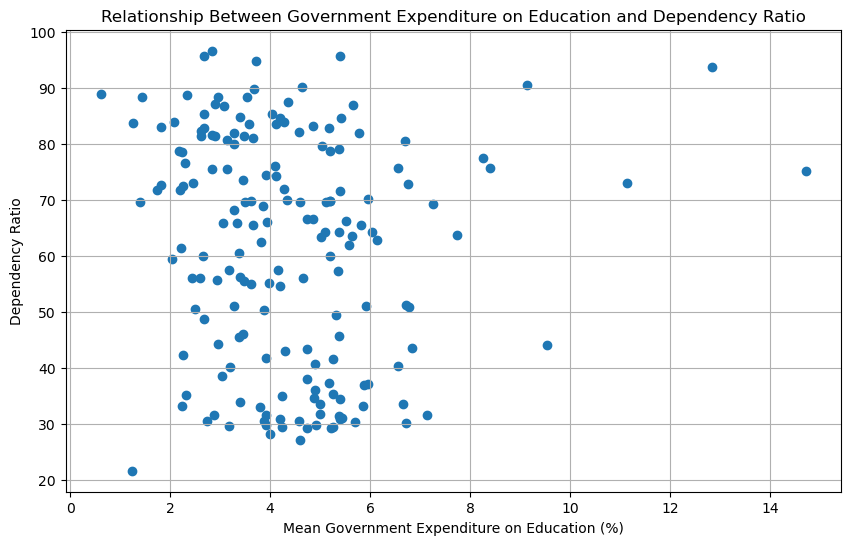

In [79]:
#Finding relationship between education expenditure and dependency ratio
growth_expenditure = pd.merge(dependency_df, mean_expenditure_per_country, on='Country name')

plt.figure(figsize=(10, 6))
plt.scatter(growth_expenditure['Percent_expenditure_education'], growth_expenditure['Dependency Ratio'])
plt.title('Relationship Between Government Expenditure on Education and Dependency Ratio')
plt.xlabel('Mean Government Expenditure on Education (%)')
plt.ylabel('Dependency Ratio')
plt.grid(True)
plt.show()

In [80]:
corr = growth_expenditure['Percent_expenditure_education'].corr(growth_expenditure['Dependency Ratio'])
print(corr)

-0.07478874383425836


#### As we can see from the result, there is not much correlation between the education expenditure and dependency ratio or population growth rate. However, this might be caused be the excessive NaN values in the education expenditure dataset, inflating the mean education data. To counter this, we looked into countries with the least NaN values for the education expenditure. 
#### From there, we analyse the relationship between the population growth rate with the education expenditure, year by year. This will help to give us a better observation on the trend observed.

In [81]:
nan_counts = df1[df1['Percent_expenditure_education'].isna()].groupby('Country name').size()
countries_least_nan = nan_counts.nsmallest(5).index
print(countries_least_nan)

Index(['Austria', 'France', 'North America', 'Netherlands', 'Norway'], dtype='object', name='Country name')


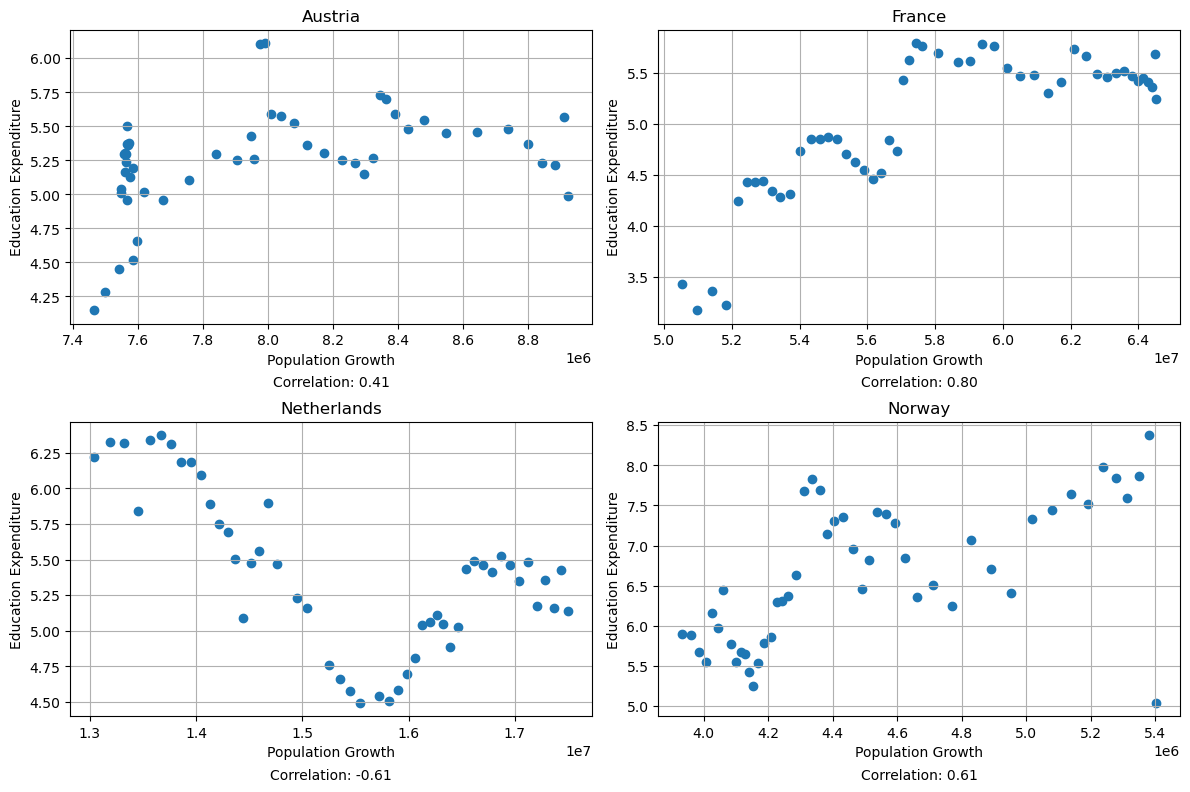

In [82]:
countries_interest = ['Austria', 'France', 'Netherlands', 'Norway'] #North America is not in the main dataset
df_countries = df_education[df_education['Country name'].isin(countries_least_nan)]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, country in zip(axs.flatten(), countries_interest):
    country_data = df_countries[df_countries['Country name'] == country]
    ax.scatter(country_data['Population'], country_data['Percent_expenditure_education'])
    ax.set_title(country)
    ax.set_ylabel('Education Expenditure')
    ax.set_xlabel('Population Growth')
    ax.grid(True)
    
    corr = country_data['Percent_expenditure_education'].corr(country_data['Population'])
    
    # Add correlation score as text under the graph
    ax.text(0.5, -0.2, f'Correlation: {corr:.2f}', transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='center')

# Adjust layout
plt.tight_layout()
plt.show()

#### From the data collected, the substantial correlation score highlights the possible linear relationship between population growth and education expenditure.
### This makes education one of the possible predictors for population growth or dependency ratio.

### Healthcare dataset

In [83]:
df2 = pd.read_csv('healthcare.csv', header = 4)
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.844428,6.137659,6.053681,5.950950,5.816684,5.801067,5.862954,NaN,NaN,NaN
2,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.528878,10.105348,11.818590,12.620817,14.208419,14.831319,15.533614,16.826062,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.595351,3.819805,3.806387,3.780062,3.393550,3.344858,3.834833,NaN,NaN,NaN
4,Angola,AGO,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.434129,2.605795,2.713150,2.793838,2.588796,2.655926,2.911835,NaN,NaN,NaN


In [84]:
#removing 3 columns (country code, indicator name and indicator code)
df2 = df2.drop(columns=[df2.columns[1], df2.columns[2], df2.columns[3]])
df2.reset_index(drop=True, inplace = True)
df2.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.844428,6.137659,6.053681,5.950950,5.816684,5.801067,5.862954,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.528878,10.105348,11.818590,12.620817,14.208419,14.831319,15.533614,16.826062,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.595351,3.819805,3.806387,3.780062,3.393550,3.344858,3.834833,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.434129,2.605795,2.713150,2.793838,2.588796,2.655926,2.911835,NaN,NaN,NaN


In [85]:
#dropping all columns with all values of nan
df2 = df2.dropna(axis=1, how='all')
df2= df2.dropna(how='all', subset=df2.columns[1:]).reset_index(drop=True)
df2.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,5.662784,5.802332,5.405845,5.990349,6.097525,5.935175,5.925775,5.939415,5.864044,...,6.152466,6.206766,5.844428,6.137659,6.053681,5.950950,5.816684,5.801067,5.862954,NaN
1,Afghanistan,NaN,NaN,9.443391,8.941258,9.808474,9.948289,10.622766,9.904675,10.256495,...,7.897169,8.805964,9.528878,10.105348,11.818590,12.620817,14.208419,14.831319,15.533614,16.826062
2,Africa Western and Central,3.758450,3.754794,3.368899,4.650321,4.458428,4.257550,4.123552,3.893575,3.719974,...,3.497437,3.613316,3.595351,3.819805,3.806387,3.780062,3.393550,3.344858,3.834833,NaN
3,Angola,1.908599,4.483516,3.329461,3.547973,3.967199,2.852195,2.685535,2.974391,3.322903,...,2.395750,2.732827,2.434129,2.605795,2.713150,2.793838,2.588796,2.655926,2.911835,NaN
4,Albania,5.944186,5.925833,5.664600,6.198919,6.055778,5.833030,5.685989,5.708428,5.509624,...,6.092626,6.272344,6.441643,6.483612,6.666062,6.546046,6.659588,NaN,NaN,NaN


In [86]:
df2.rename(columns={'Country Name': 'Country name'}, inplace=True)
df2 = df2.melt(id_vars=['Country name'], var_name='Year', value_name='healthcare_expenditure')
df2['Year'] = df2['Year'].astype(int)
df_healthcare = pd.merge(df, df2, on=['Country name', 'Year'])
df_healthcare.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years,Dependency Ratio,healthcare_expenditure
0,Afghanistan,2000,19542986,898809.0,4044487,9716430,13343836,9380030,9826547,8606509,...,1971689,1256153,861541,495073,202165,37212,1674,9.0,103.586342,NaN
1,Afghanistan,2001,19688634,894038.0,4046425,9817924,13458009,9420852,9870699,8634748,...,1992112,1263743,854291,494970,204078,38010,1721,10.0,104.214820,NaN
2,Afghanistan,2002,21000258,941149.0,4280854,10488288,14365919,10031304,10511959,9179506,...,2131886,1346252,899545,524785,218247,41164,1879,11.0,104.555579,9.443391
3,Afghanistan,2003,22645136,999679.0,4574403,11313832,15499313,10811842,11331293,9877464,...,2307019,1451498,958962,563715,236002,45091,2075,11.0,104.642965,8.941258
4,Afghanistan,2004,23553554,1020639.0,4705370,11758413,16126358,11254198,11795131,10265167,...,2409322,1511624,986258,585104,246037,47662,2212,11.0,104.480239,9.808474


In [87]:
mean_health_country = df_healthcare.groupby('Country name')['healthcare_expenditure'].mean()

# Display the mean expenditure for each country
print(mean_health_country)

Country name
Afghanistan    10.902580
Albania         6.093392
Algeria         5.035450
Andorra         6.521148
Angola          2.956530
                 ...    
Uzbekistan      5.090768
Vanuatu         3.499415
World           9.475729
Zambia          5.200252
Zimbabwe        6.704907
Name: healthcare_expenditure, Length: 168, dtype: float64


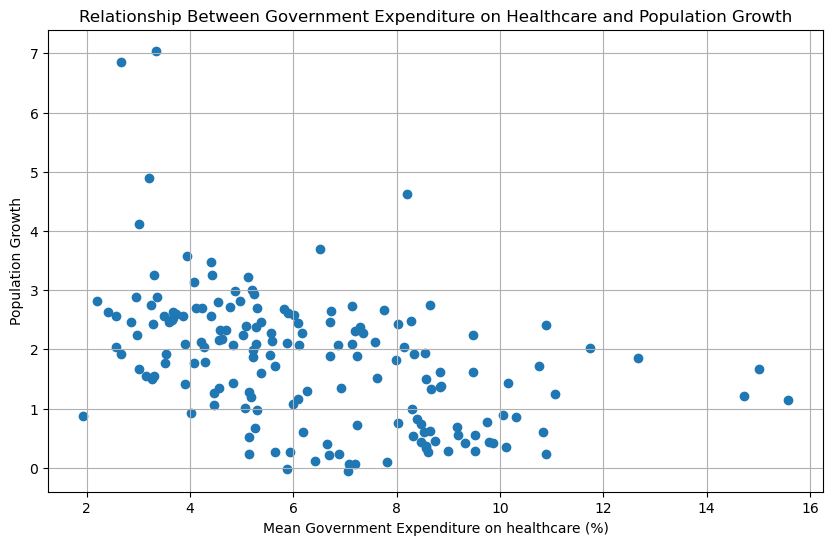

In [88]:
#Finding relationship between population growth and healthcare expenditure

health_exp = pd.merge(avg_growth, mean_health_country, on='Country name')

plt.figure(figsize=(10, 6))
plt.scatter(health_exp['healthcare_expenditure'], health_exp['Population Growth Rate'])
plt.title('Relationship Between Government Expenditure on Healthcare and Population Growth')
plt.xlabel('Mean Government Expenditure on healthcare (%)')
plt.ylabel('Population Growth')
plt.grid(True)
plt.show()

In [89]:
corr = health_exp['healthcare_expenditure'].corr(health_exp['Population Growth Rate'])
print(corr)

-0.4367470721924086


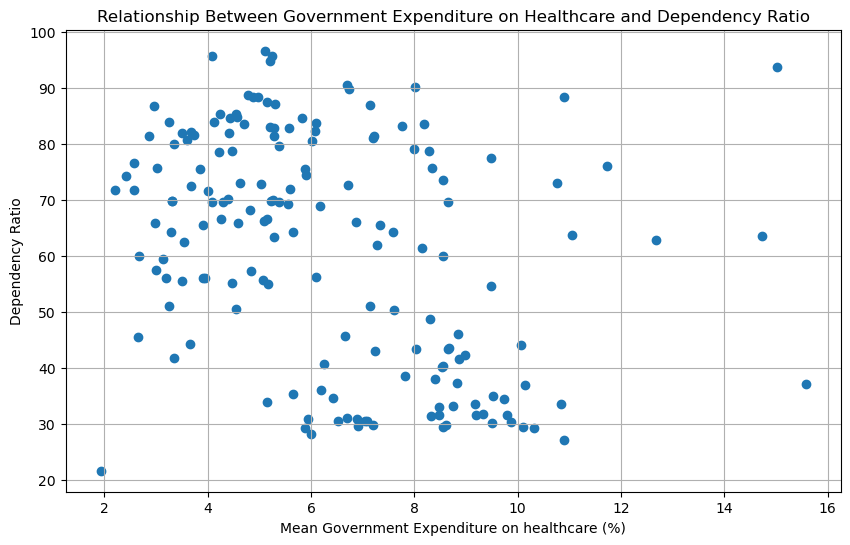

In [90]:
#Finding relationship between dependency ratio and healthcare expenditure

health_exp = pd.merge(dependency_df, mean_health_country, on='Country name')

plt.figure(figsize=(10, 6))
plt.scatter(health_exp['healthcare_expenditure'], health_exp['Dependency Ratio'])
plt.title('Relationship Between Government Expenditure on Healthcare and Dependency Ratio')
plt.xlabel('Mean Government Expenditure on healthcare (%)')
plt.ylabel('Dependency Ratio')
plt.grid(True)
plt.show()

In [91]:
corr = health_exp['healthcare_expenditure'].corr(health_exp['Dependency Ratio'])
print(corr)

-0.35039218892910307


#### As shown, healthcare expenditure has a more linear relationship in population growth compared to dependency ratio. This can be a potential indicator for demographic shifts.

In [92]:
main_df = pd.merge(df_education, df2, on=['Country name', 'Year'])
main_df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years,Dependency Ratio,Percent_expenditure_education,healthcare_expenditure
0,Afghanistan,2000,19542986,898809.0,4044487,9716430,13343836,9380030,9826547,8606509,...,1256153,861541,495073,202165,37212,1674,9.0,103.586342,NaN,NaN
1,Afghanistan,2001,19688634,894038.0,4046425,9817924,13458009,9420852,9870699,8634748,...,1263743,854291,494970,204078,38010,1721,10.0,104.214820,NaN,NaN
2,Afghanistan,2002,21000258,941149.0,4280854,10488288,14365919,10031304,10511959,9179506,...,1346252,899545,524785,218247,41164,1879,11.0,104.555579,NaN,9.443391
3,Afghanistan,2003,22645136,999679.0,4574403,11313832,15499313,10811842,11331293,9877464,...,1451498,958962,563715,236002,45091,2075,11.0,104.642965,NaN,8.941258
4,Afghanistan,2004,23553554,1020639.0,4705370,11758413,16126358,11254198,11795131,10265167,...,1511624,986258,585104,246037,47662,2212,11.0,104.480239,NaN,9.808474


In [93]:
main_df.to_csv('EDAothers.csv', index=False)